In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
newman = pd.read_pickle('../data/newman_RRs.pcl')

In [3]:
data = np.load('../data/ground_truth_runoff_ratios.npz')
vic = pd.DataFrame()
for key in data.keys():
    vic[key] = data[key]

vic.columns = ['GAGE_ID','RR']

In [4]:
data = pd.merge(newman,vic,on='GAGE_ID')

In [5]:
data2 = np.load('../data/ground_truth_ltp.npz')
vic = pd.DataFrame()
for key in data2.keys():
    vic[key] = data2[key]

vic.columns = ['GAGE_ID','LTP']

In [6]:
data = pd.merge(data,vic,on='GAGE_ID')

In [7]:
data2 = np.load('../data/ground_truth_ltq.npz')
vic = pd.DataFrame()
for key in data2.keys():
    vic[key] = data2[key]

vic.columns = ['LTQ','GAGE_ID']

In [8]:
data = pd.merge(data,vic,on='GAGE_ID')

In [9]:
data2 = np.load('/Volumes/Users/Theo/projects/Budyko_vic/data/ground_truth_ltETPET.npz')
vic = pd.DataFrame()
for key in data2.keys():
    vic[key] = data2[key]

vic.columns = ['GAGE_ID','LTPET','LTET']

In [10]:
data = pd.merge(data,vic,on='GAGE_ID')

In [11]:
data['RR3'] = data.LTQ/data.LTP

In [12]:
data['RR2'] = data.Q/data.LTP

In [13]:
# remove some really odd basins
data.loc[(data.NLDAS_RR>1.5)|(data.DAYMET_RR>1.5)|(data.MAURER_RR>1.5)|(data.RR2>1.5)] = np.NaN
data.dropna(inplace=True)

In [14]:
from palettable.wesanderson import Zissou_5 as colors 

In [15]:
import statsmodels.formula.api as sm

In [16]:
mods = []
for force in ['DAYMET_RR','MAURER_RR','NLDAS_RR','RR2']:
    mods.append(sm.ols(formula='RR3 ~ '+force+' -1',data=data).fit())

In [17]:
titles = []
for mod in mods:
    titles.append('R$^2$=%s, Slope=%s'%(round(mod.rsquared,2),round(mod.params[0],2)))

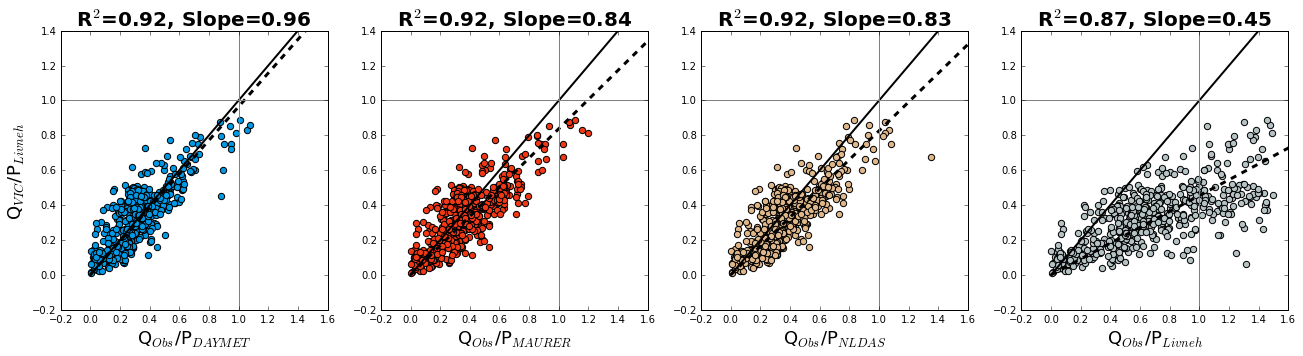

In [18]:
fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(141)
ax1.scatter(data.DAYMET_RR,data.RR3,s=40,c=colors.hex_colors[0])
ax1.plot(np.arange(0,2,0.1),np.arange(0,2,0.1)*mods[0].params[0],'--k',lw=3)
ax1.plot([0,2],[0,2],'-k',lw=2)
ax2 = fig.add_subplot(142)
ax2.scatter(data.MAURER_RR,data.RR3,s=40,c=colors.hex_colors[2])
ax2.plot(np.arange(0,2,0.1),np.arange(0,2,0.1)*mods[1].params[0],'--k',lw=3)
ax2.plot([0,2],[0,2],'-k',lw=2)

ax3 = fig.add_subplot(143)
ax3.scatter(data.NLDAS_RR,data.RR3,s=40,c=colors.hex_colors[3])
ax3.plot(np.arange(0,2,0.1),np.arange(0,2,0.1)*mods[2].params[0],'--k',lw=3)
ax3.plot([0,2],[0,2],'-k',lw=2)

ax4 = fig.add_subplot(144)
ax4.scatter(data.RR2,data.RR3,s=40,c=colors.hex_colors[4])
ax4.plot(np.arange(0,2,0.1),np.arange(0,2,0.1)*mods[3].params[0],'--k',lw=3)
ax4.plot([0,2],[0,2],'-k',lw=2)

for ax,title in zip([ax1,ax2,ax3,ax4],titles):
    ax.set_xlim(-0.2,1.6)
    ax.set_ylim(-0.2,1.4)
    ax.axvline(1,c='0.5')
    ax.axhline(1,c='0.5')
    ax.set_title(title,fontsize=20, fontweight='bold')

ax1.set_xlabel('Q$_{Obs}$/P$_{DAYMET}$',fontsize=18)
ax2.set_xlabel('Q$_{Obs}$/P$_{MAURER}$',fontsize=18)
ax3.set_xlabel('Q$_{Obs}$/P$_{NLDAS}$',fontsize=18)
ax1.set_ylabel('Q$_{VIC}$/P$_{Livneh}$', fontsize=18)
ax4.set_xlabel('Q$_{Obs}$/P$_{Livneh}$', fontsize=18)

#plt.savefig('../figures/VIC_NEWMAN_RR_comp.png',dpi=300,bbox_inches='tight')

In [31]:
print data.DAYMET_RR.max()
print data.NLDAS_RR.max()
print data.MAURER_RR.max()

1.07592319576
1.35106198945
1.19524498647


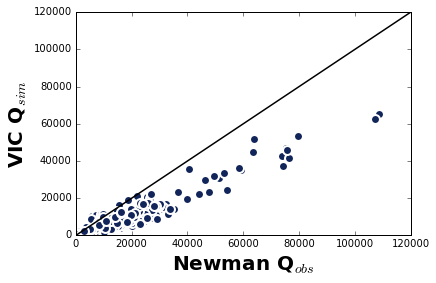

In [19]:
plt.scatter(data.Q,data.LTQ,s=80,c=colors.hex_colors[1],edgecolor='w',lw=2)
plt.plot([0,120000],[0,120000],'-k',lw=1.5)
plt.xlim(0,120000)
plt.ylim(0,120000)
plt.xlabel('Newman Q$_{obs}$', fontsize = 20, weight='bold')
plt.ylabel('VIC Q$_{sim}$', fontsize = 20, weight='bold')

In [20]:
mods2 = []

for p in ['DAYMET_P','MAURER_P','NLDAS_P']:
    mods2.append(sm.ols('LTP ~ '+p+' - 1', data).fit())

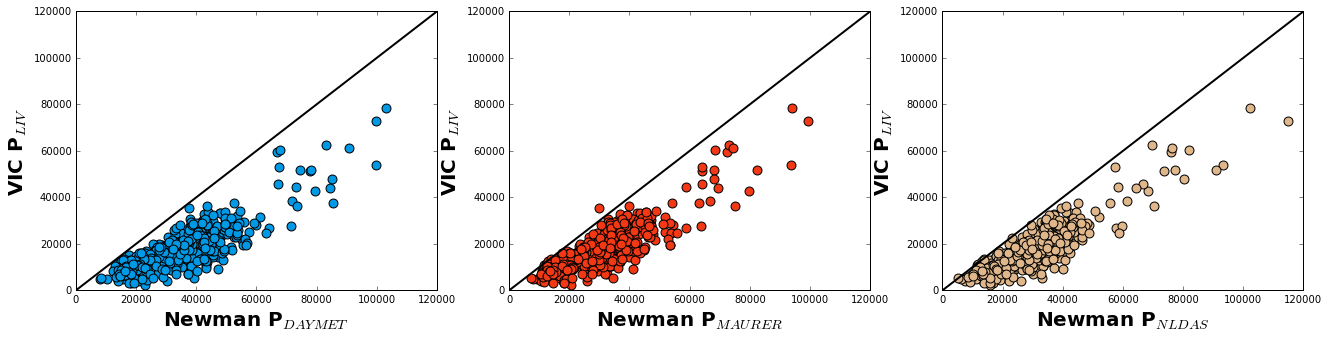

In [21]:
fig = plt.figure(figsize=(22,5))

ax1 = fig.add_subplot(131)
plt.scatter(data.DAYMET_P,data.LTP,s=80,c=colors.hex_colors[0])
plt.plot([0,120000],[0,120000],'-k',lw=2)
plt.xlim(0,120000)
plt.ylim(0,120000)
plt.xlabel('Newman P$_{DAYMET}$', fontsize = 20, weight='bold')
plt.ylabel('VIC P$_{LIV}$', fontsize = 20, weight='bold')

ax2 = fig.add_subplot(132)
plt.scatter(data.MAURER_P,data.LTP,s=80,c=colors.hex_colors[2])
plt.plot([0,120000],[0,120000],'-k',lw=2)
plt.xlim(0,120000)
plt.ylim(0,120000)
plt.xlabel('Newman P$_{MAURER}$', fontsize = 20, weight='bold')
plt.ylabel('VIC P$_{LIV}$', fontsize = 20, weight='bold')

ax3 = fig.add_subplot(133)
plt.scatter(data.NLDAS_P,data.LTP,s=80,c=colors.hex_colors[3])
plt.plot([0,120000],[0,120000],'-k',lw=2)
plt.xlim(0,120000)
plt.ylim(0,120000)
plt.xlabel('Newman P$_{NLDAS}$', fontsize = 20, weight='bold')
plt.ylabel('VIC P$_{LIV}$', fontsize = 20, weight='bold')

## Is there a relationship between Runoff Error and Streamflow Anomaly

In [22]:
data['PET_P'] = data.LTPET/data.LTP
data['ET_P'] = data.LTET/data.LTP

In [23]:
def budyko(DI):
    return np.sqrt(DI*np.tanh(1/DI)*(1-np.exp(-DI)))

In [24]:
DI = np.arange(0,50.001,0.001) # make a range to compute the budyko curve over
EI = budyko(DI) # compute the Budyko Curve
data['pred_EI'] = data['PET_P'].apply(budyko) # compute the predicted evaportative index for each cell given its aridity

data['Q_P'] = 1.-data['ET_P'] # compute actual runoff for each cell 
data['Qpred_P'] = 1.-data['pred_EI'] # compute predicted runoff for each cell
data['Qanom_P'] = data['Q_P']-data['Qpred_P'] # compute the anomoly (actual - predicted)

In [25]:
data['Qerr'] = data['LTQ'] - data['Q']

In [26]:
tmp = sm.ols('Qerr ~ Qanom_P + 1',data).fit()

In [27]:
print tmp.summary()

                            OLS Regression Results                            
Dep. Variable:                   Qerr   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7814
Date:                Wed, 09 Mar 2016   Prob (F-statistic):              0.377
Time:                        12:17:41   Log-Likelihood:                -5673.8
No. Observations:                 560   AIC:                         1.135e+04
Df Residuals:                     558   BIC:                         1.136e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -5927.9936    257.809    -22.994      0.0

In [28]:
sns.lmplot('Qanom_P','Qerr',data,scatter_kws={'c':colors.hex_colors[0]})
plt.ylabel('Discharge Error \n (Q$_{VIC}$ - Q$_{Obs}$ [mm])', fontsize=20, weight='bold')
plt.xlabel('Q$_{anomaly}$/P$_{Livneh}$', fontsize=20, weight='bold')
title = 'R$^2$=%s, pVal=%s'%(round(tmp.rsquared,3),round(tmp.f_pvalue,2))
plt.title(title, fontsize = 24, weight = 'bold')

NameError: name 'sns' is not defined

## Create a Summary Plot


Slope 0.519284928239
Pval 0.0
R2 0.932
Slope 0.596325310793
Pval 0.0
R2 0.939
Slope 0.606907505418
Pval 0.0
R2 0.946


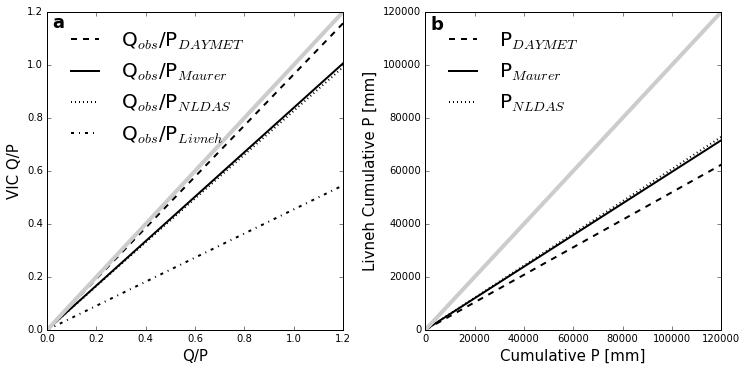

In [29]:
ltps= ['--','-',':','-.']

fig = plt.figure(figsize=(10.5,5.25))

ax1 = fig.add_subplot(121)
leg = ['Q$_{obs}$/P$_{DAYMET}$','Q$_{obs}$/P$_{Maurer}$','Q$_{obs}$/P$_{NLDAS}$','Q$_{obs}$/P$_{Livneh}$']
for mod,lt in zip(mods,ltps):
    slp = mod.params[0]
    inter = 0
    xnew = np.array([0,0.5,1,1.5])
    ynew = inter + slp*xnew
    ax1.plot(xnew,ynew,lt, c= 'k',lw=2)

ax1.plot([0,2],[0,2],'-',c = '0.8',lw=4)
ax1.set_xlim(0,1.2)
ax1.set_ylim(0,1.2)
ax1.legend(leg, loc='best', fontsize=20, frameon=False)
ax1.set_xlabel('Q/P', fontsize = 15)
ax1.set_ylabel('VIC Q/P', fontsize = 15)
ax1.annotate('a',[0.02,1.14],fontsize = 18, weight='bold',color='k')

ax2 = fig.add_subplot(122)

ltps= ['--','-',':']
leg = ['P$_{DAYMET}$','P$_{Maurer}$','P$_{NLDAS}$']
for mod,lt in zip(mods2,ltps):
    slp = mod.params[0]
    inter = 0
    xnew = np.linspace(0,120500,400)
    ynew = inter + slp*xnew
    ax2.plot(xnew,ynew,lt, c= 'k',lw=2)
    print 'Slope',slp
    print 'Pval',round(mod.f_pvalue,3)
    print 'R2',round(mod.rsquared,3)
ax2.plot([0,120000],[0,120000],'-',c = '0.8',lw=4)
ax2.set_xlim(0,120000)
ax2.set_ylim(0,120000)
ax2.set_xlabel('Cumulative P [mm]', fontsize = 15)
ax2.set_ylabel('Livneh Cumulative P [mm]', fontsize = 15)
ax2.legend(leg, loc='best', fontsize=20, frameon=False)
ax2.annotate('b',[2000,113100],fontsize = 18, weight='bold',color='k')
fig.tight_layout()
#plt.savefig('../figures/ground_truth_summary.png', dpi = 300, bbox_inches='tight')

0.96
0.84
0.83


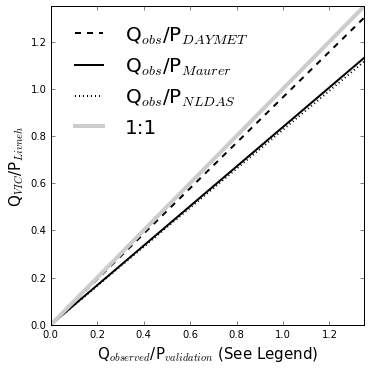

In [32]:
ltps= ['--','-',':','-.']

fig = plt.figure(figsize=(5.25,5.25))

ax1 = fig.add_subplot(111)
leg = ['Q$_{obs}$/P$_{DAYMET}$','Q$_{obs}$/P$_{Maurer}$','Q$_{obs}$/P$_{NLDAS}$','1:1']
for mod,lt in zip(mods[0:3],ltps[0:3]):
    slp = mod.params[0]
    inter = 0
    xnew = np.array([0,0.5,1,1.5])
    ynew = inter + slp*xnew
    ax1.plot(xnew,ynew,lt, c= 'k',lw=2)
    print round(slp,2)

ax1.plot([0,2],[0,2],'-',c = '0.8',lw=4)
ax1.set_xlim(0,1.35)
ax1.set_ylim(0,1.35)
ax1.legend(leg, loc='best', fontsize=20, frameon=False)
ax1.set_xlabel('Q$_{observed}$/P$_{validation}$ (See Legend)', fontsize = 15)
ax1.set_ylabel('Q$_{VIC}$/P$_{Livneh}$', fontsize = 15)
fig.tight_layout()
plt.savefig('../figures/ground_truth_summary_single.png', dpi = 300, bbox_inches='tight')
#plt.savefig('../figures/ground_truth_summary_single.pdf', bbox_inches='tight')